In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerLine2D

In [2]:
path_np = os.path.abspath('../../../1_Simulation_Results/numpy_files/')
path_csv = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [3]:
timeS_GF = np.load(path_np+'/Gaussian/Fitting/time.npy')
vel_GF = np.load(path_np+'/Gaussian/Fitting/vel.npy')
timeS_GT = np.load(path_np+'/Gaussian/TDB/time.npy')
vel_GT = np.load(path_np+'/Gaussian/TDB/vel.npy')

timeS_FF = np.load(path_np+'/FlatTop/Fitting/time.npy')
vel_FF = np.load(path_np+'/FlatTop/Fitting/vel.npy')
timeS_FT = np.load(path_np+'/FlatTop/TDB/time.npy')
vel_FT = np.load(path_np+'/FlatTop/TDB/vel.npy')

timeS_RF = np.load(path_np+'/Ring/Fitting/time.npy')
vel_RF = np.load(path_np+'/Ring/Fitting/vel.npy')
timeS_RT = np.load(path_np+'/Ring/TDB/time.npy')
vel_RT = np.load(path_np+'/Ring/TDB/vel.npy')

timeS_BF = np.load(path_np+'/Bessel/Fitting/time.npy')
vel_BF = np.load(path_np+'/Bessel/Fitting/vel.npy')
timeS_BT = np.load(path_np+'/Bessel/TDB/time.npy')
vel_BT = np.load(path_np+'/Bessel/TDB/vel.npy')

In [4]:
def max_vel_array(array):
    maxVel_array = np.zeros(array.shape[-1])
    for i in range(array.shape[-1]):
        maxVel_array[i] = array[0:1,:,i].max()
    return maxVel_array

In [5]:
maxVel_GT = max_vel_array(vel_GT)
maxVel_GF = max_vel_array(vel_GF)
maxVel_FT = max_vel_array(vel_FT)
maxVel_FF = max_vel_array(vel_FF)
maxVel_RT = max_vel_array(vel_RT)
maxVel_RF = max_vel_array(vel_RF)
maxVel_BT = max_vel_array(vel_BT)
maxVel_BF = max_vel_array(vel_BF)

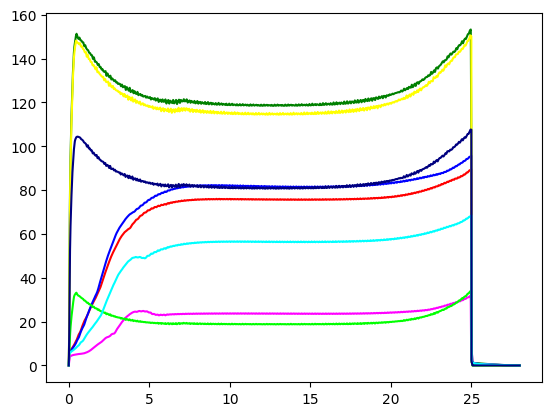

In [6]:
plt.plot(timeS_GT, maxVel_GT, color='red')
plt.plot(timeS_GF, maxVel_GF, color='green')
plt.plot(timeS_FT, maxVel_FT, color='blue')
plt.plot(timeS_FF, maxVel_FF, color='yellow')
plt.plot(timeS_RT, maxVel_RT, color='magenta')
plt.plot(timeS_RF, maxVel_RF, color='lime')
plt.plot(timeS_BT, maxVel_BT, color='cyan')
plt.plot(timeS_BF, maxVel_BF, color='navy')

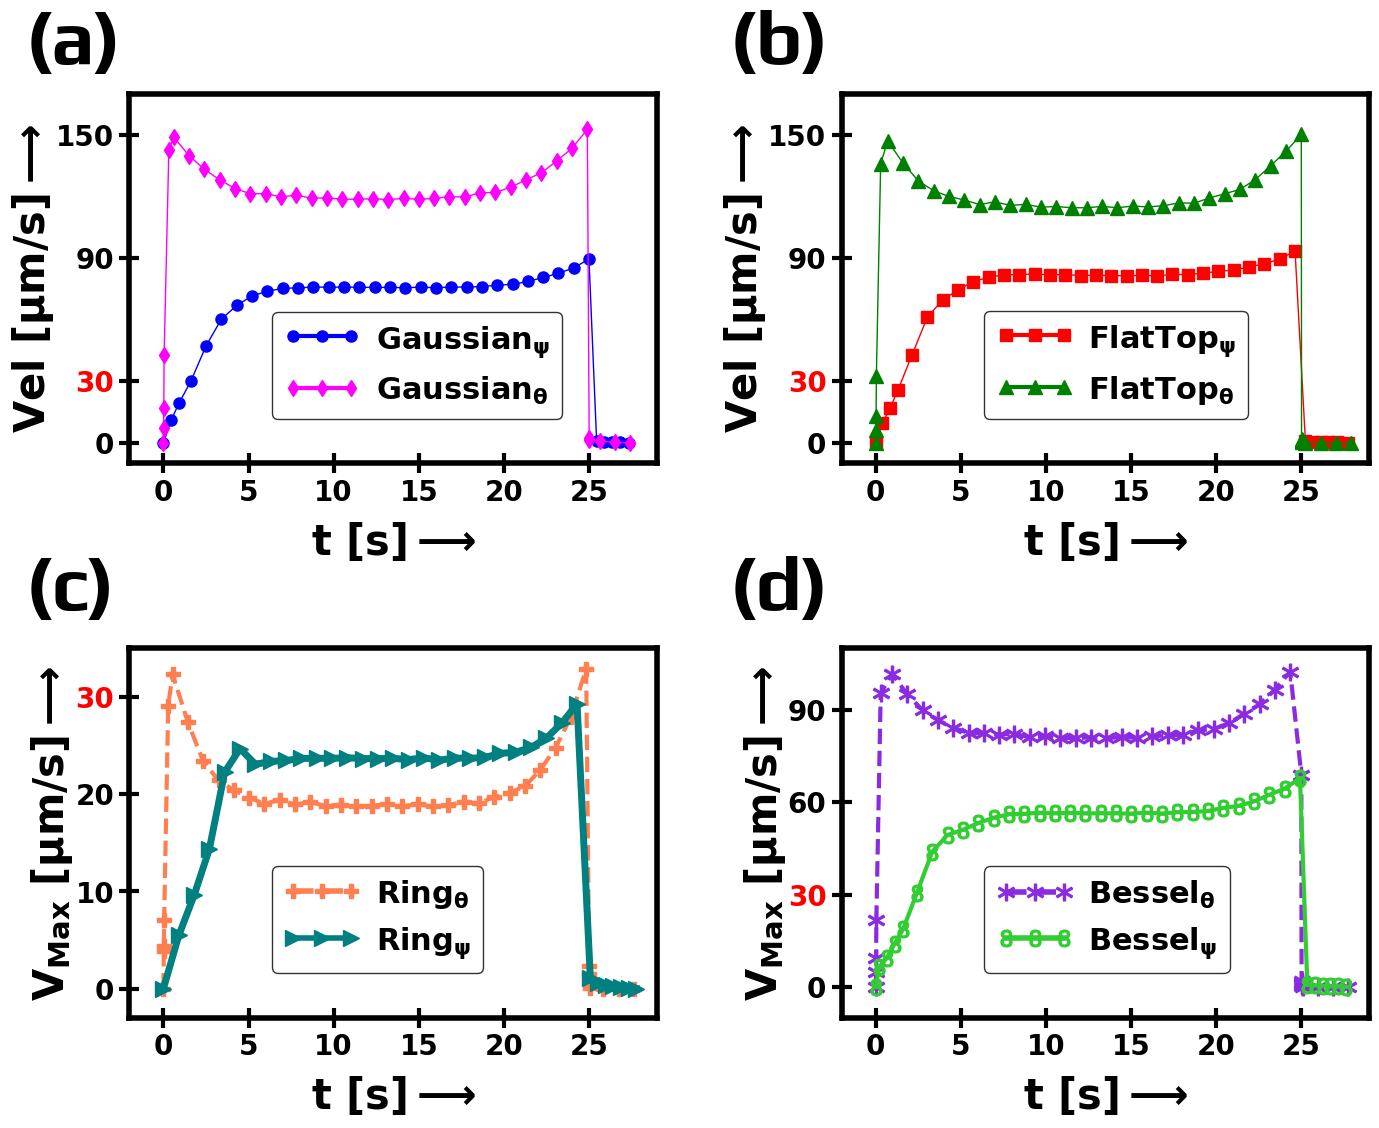

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[16, 12], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)

x = int((401/1000)*500) # x-coordinate of point of interest
y = 0 # y coordinate of point of interest ## origin is at top left corner

GT, = ax1.plot(timeS_GT[::15], maxVel_GT[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'Gaussian$\mathbf{_{\psi}}$')
GF, = ax1.plot(timeS_GF[::15], maxVel_GF[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'Gaussian$\mathbf{_{\theta}}$')
ax1.set_ylabel(r"Vel $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 30, 90, 150,], labels=['0', '30', '90', '150',], size=20, color='k', weight='bold')
for label, color in zip(ax1.get_yticklabels(), ['k', 'red', 'k', 'k']): label.set_color(color)
ax1.set_ylim(-10, 170)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_G = ax1.legend(loc=(0.27, 0.12), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={GT: HandlerLine2D(numpoints=3), GF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_G.get_lines()]

FT, = ax2.plot(timeS_FT[::15], maxVel_FT[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'FlatTop$\mathbf{_{\psi}}$')
FF, = ax2.plot(timeS_FF[::15], maxVel_FF[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label=r'FlatTop$\mathbf{_{\theta}}$')
ax2.set_ylabel(r"Vel $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 30, 90, 150,], labels=['0', '30', '90', '150',], size=20, color='k', weight='bold')
for label, color in zip(ax2.get_yticklabels(), ['k', 'red', 'k', 'k']): label.set_color(color)
# ax2.set_title("Gaussian HS", fontsize=30, weight='bold', pad=10)
ax2.set_ylim(-10, 170)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_F = ax2.legend(loc=(0.27, 0.12), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={FT: HandlerLine2D(numpoints=3), FF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_F.get_lines()]


RF, = ax3.plot(timeS_RF[::15], maxVel_RF[::15], linewidth=3, linestyle='--', marker='P', markersize=10, color='coral', label=r'Ring$\mathbf{_{\theta}}$')
RT, = ax3.plot(timeS_RT[::15], maxVel_RT[::15], linewidth=5, linestyle='-',  marker='>', markersize=12, color = 'teal', label =r'Ring$\mathbf{_{\psi}}$')
ax3.set_ylabel(r"V$_\mathbf{{Max}}$ $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax3.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax3.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax3.set_yticks([0, 10, 20, 30, ], labels=['0', '10', '20', '30',], size=20, color='k', weight='bold')
for label, color in zip(ax3.get_yticklabels(), ['k', 'k', 'k', 'red']): label.set_color(color)
ax3.set_ylim(-3, 35)
ax3.set_xlim(-2, 29)
ax3.spines[:].set_linewidth(4)
ax3.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_R = ax3.legend(loc=(0.27, 0.12), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={RT: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4) for line in legend_R.get_lines()]
# ax3.hlines(y=30, xmin=-2, xmax=29, linewidth=2, linestyle=':', color='red')

BF, = ax4.plot(timeS_BF[::15], maxVel_BF[::15], linewidth=3, linestyle='--',marker='$*$', markersize=12, color='blueviolet', label=r'Bessel$\mathbf{_{\theta}}$')
BT, = ax4.plot(timeS_BT[::15], maxVel_BT[::15], linewidth=3, linestyle='-',marker='$8$', markersize=12, color = 'limegreen', label =r'Bessel$\mathbf{_{\psi}}$')
ax4.set_ylabel(r"V$_\mathbf{{Max}}$ $ \mathbf{ [\mu m/s] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax4.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax4.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax4.set_yticks([0, 30, 60, 90, ], labels=['0', '30', '60', '90',], size=20, color='k', weight='bold')
for label, color in zip(ax4.get_yticklabels(), ['k', 'red', 'k', 'k']): label.set_color(color)
    
ax4.set_ylim(-10, 110)
ax4.set_xlim(-2, 29)
ax4.spines[:].set_linewidth(4)
ax4.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_B = ax4.legend(loc=(0.27, 0.12), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={BT: HandlerLine2D(numpoints=3), BF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(4) for line in legend_B.get_lines()]
# ax4.hlines(y=30, xmin=-2, xmax=29, linewidth=2, linestyle=':', color='red')

text_a = Text(x=0.06, y=0.905, text=r'(a)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_b = Text(x=0.5, y=0.905, text=r'(b)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_c = Text(x=0.06, y=0.45, text=r'(c)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')
text_d = Text(x=0.5, y=0.45, text=r'(d)', fontsize=55, color='k', rotation=0, weight='bold', fontname='Play')

fig.add_artist(text_a)
fig.add_artist(text_b)
fig.add_artist(text_c)
fig.add_artist(text_d)

# plt.savefig('../../figures/Vel.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Vel.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Vel.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Vel.jpg',bbox_inches='tight',)

plt.show()